# Simple Batch Breakpoint generator python

This jupyter notebook script will generate responsive image for lazy-srcset website, maintain aspect ratio, no stretch. Normally I have to generate it via https://www.responsivebreakpoints.com/ or photoscape which a bit slow.

## Story and explaination

I've a created a Vue very-lazy and simple-to-use src set component. the property are similar to  and I don't need to worry about other property and that component included fixed Breakpoint size [200,763,1132,1400] in other website in production (not in this project) It's work perfectly with this image generator.

## How to use?

Specify the folder path that have all the image (recursive) and breakpoint width in list and run the script.

## Import Library

In [10]:
import os, sys
from PIL import Image
import math 
import glob 

## Defined Function

In [17]:
def resize_maintain_aspect_by_width(PIL_Image,new_width):
    '''
    This function get image and resize by width (maintain aspect ratio) without strech
    '''
    width, height = PIL_Image.size
    # if new width is greater than original width, return the image (no strech)
    if new_width > width:
        return PIL_Image
    
    new_height = math.floor(new_width * height / width )
    return PIL_Image.resize((new_width, new_height), Image.ANTIALIAS)

In [18]:
def savebreakpoint(filename,PIL_Image,breakpoint,formatter="%s_%s"):
    '''
    This function save PIL image by add postfix from specify breakpoint
    '''
    path = filename.rsplit('.', 1)
    path[0] = formatter % (path[0] , breakpoint)
    PIL_Image.save(r'.'.join(path))

## Config

In [19]:
# set breakpoints width
breakpoints = [200,763,1132,1400]

# set the folder path, Can set to any folder you want.
files = glob.glob('./testbatch/**/*.jpg',recursive = True) 

# format {Filename}_{breakpoint}.jpg eg. car_200.jpg
formatter="%s_%s"

# format example 2 {Filename}_w{breakpoint}.jpg eg. car_w200.jpg
#formatter="%s_w%s"

## Run

In [21]:
for file in files:
    im = Image.open(file) 
    for breakpoint in breakpoints:
        tmp = resize_maintain_aspect_by_width(im,breakpoint)
        savebreakpoint(file,tmp,breakpoint,formatter) 

### Output: Sample.jpg to Sample_200.jpg, Sample_763.jpg, Sample_1132.jpg, Sample_1400.jpg

## Sample Output

In [173]:
from IPython.display import clear_output
import IPython.display as display
from matplotlib import pyplot as plt
%matplotlib inline 

def _plot(_type,fp):
    tmp = Image.open(fp)
    plt.xlabel( "{0} : Size In Bytes:- {1:20,} kB".format( _type,len(tmp.fp.read()) ))
    plt.imshow(Image.open(fp))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

def show_preview():
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    _plot("Original",'./testbatch\\IMG_20200101_125629_1.jpg')
    plt.figure(figsize=(20,20))
    plt.subplot(2,3,1)
    _plot("Width 200",'./testbatch\\IMG_20200101_125629_1_200.jpg')
    plt.subplot(2,3,2)
    _plot("Width 763",'./testbatch\\IMG_20200101_125629_1_763.jpg')
    plt.subplot(2,3,3)
    _plot("Width 1132",'./testbatch\\IMG_20200101_125629_1_1132.jpg')
    plt.subplot(2,3,4)
    _plot("Width 1400",'./testbatch\\IMG_20200101_125629_1_1400.jpg')


## Preview

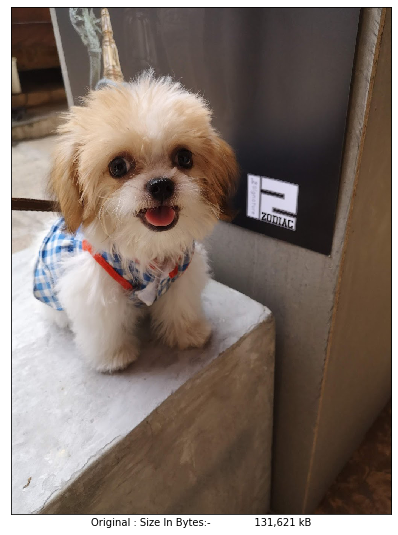

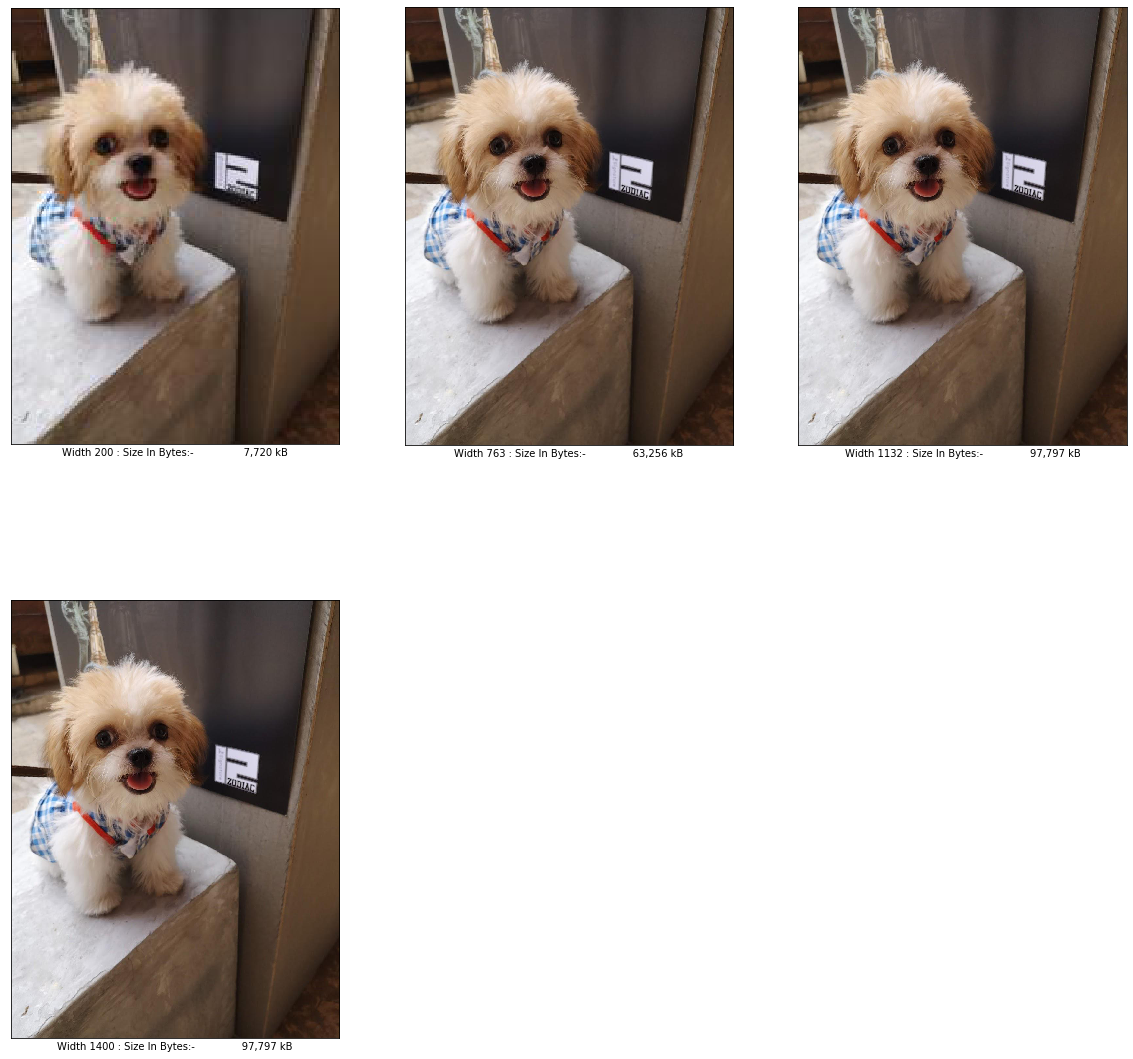

In [174]:
show_preview()